In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# HW3

Распределе́ние Фи́шера в теории вероятностей — это двухпараметрическое семейство абсолютно непрерывных распределений.

Пусть Y1, Y2 — две независимые случайные величины, имеющие распределение хи-квадрат: 
$$ {\displaystyle Y_{i}\sim \chi ^{2}(d_{i})},$$ где  $${ \displaystyle d_{i}\in \mathbb {N} ,\;i=1,2} d_{i}\in {\mathbb  {N}},\;i=1,2. $$ 
Тогда распределение случайной величины
$$ F={\frac  {Y_{1}/d_{1}}{Y_{2}/d_{2}}}, $$
называется распределением Фишера (распределением Снедекора) со степенями свободы d1, d2

## Генерирование выборки объема 1000 распределения Фишера

In [79]:
dfn, dfd = 4, 40 # параметры распределения
frv = sts.f(dfn, dfd)
gen_frv = frv.rvs(size=1000) # создание выборки

## Построение гистограммы и графика теоретической плотности

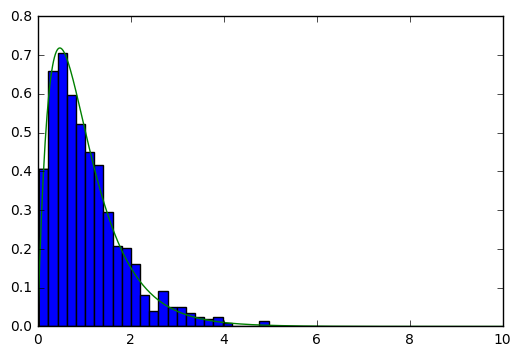

In [80]:
plt.hist(gen_frv, 25, normed=True)
rv = sts.f(dfn, dfd)
x = np.linspace(0.0001, 10, 500)
h = plt.plot(x, rv.pdf(x))
plt.show()

## Оценка выборочного среднего

In [ ]:
def calc_sample_mean(n_values, n_samples, dfn, dfd):
    rv = sts.f(dfn, dfd)
    
    
    
    for x in range(0, n_samples):
        
    